In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Dataset
df = pd.read_csv('./income_evaluation.csv')
df.columns = list(map(lambda a: a.lstrip(), df.columns))
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploratory Data Analysis

## Count Missing Values

In [3]:
missing_count = {}
for column in df.columns:
    df[column].replace(' ?', np.NaN, inplace=True)
    missing_count[column] = df[column].isna().sum()

for key in missing_count:
  print(f"{key}: {missing_count[key]}")

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 583
income: 0


In [4]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## Count Numerical & Categorical Features

In [5]:
numerical_features=[features for features in df.columns if df[features].dtype!='O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

print("Numerical Features: ", ', '.join(numerical_features), "\nCategorical Features: ", ', '.join(categorical_features))

Numerical Features:  age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week 
Categorical Features:  workclass, education, marital-status, occupation, relationship, race, sex, native-country, income


## Continuous and Discrete Features

In [6]:
continuous_features=[features for features in numerical_features if len(pd.unique(df[features]))>25]
discrete_features=[features for features in numerical_features if len(pd.unique(df[features]))<=25]
print("Continuous Features: ", ', '.join(continuous_features), "\nDiscrete Features: ", ', '.join(discrete_features))

Continuous Features:  age, fnlwgt, capital-gain, capital-loss, hours-per-week 
Discrete Features:  education-num


## Pair Plots

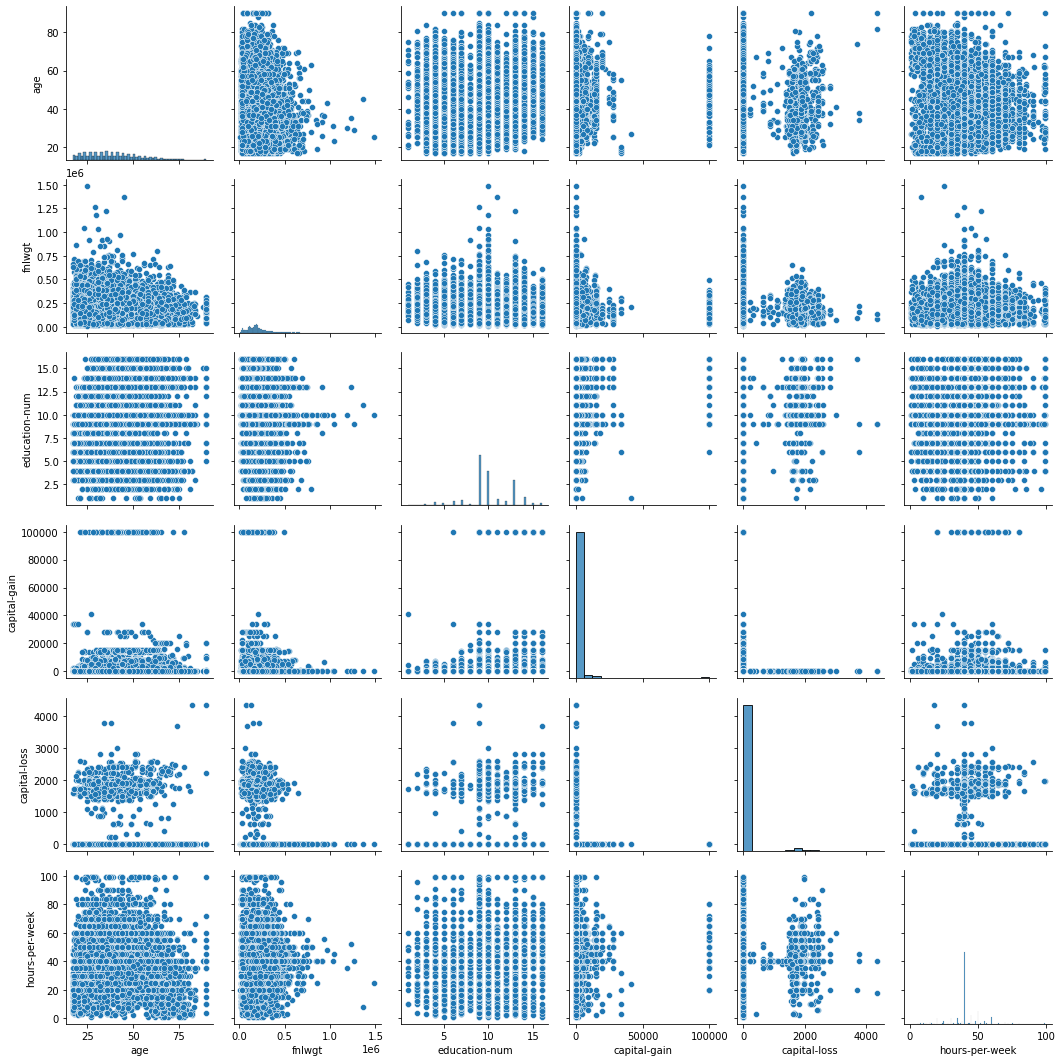

In [7]:
sns.pairplot(df,kind='scatter')

## Histograms

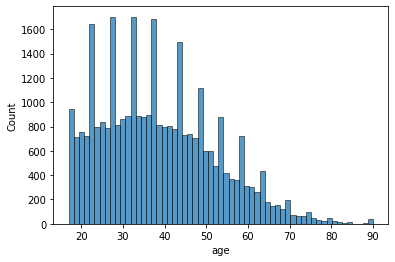

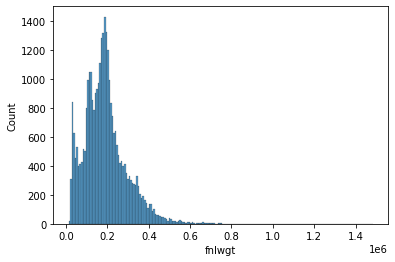

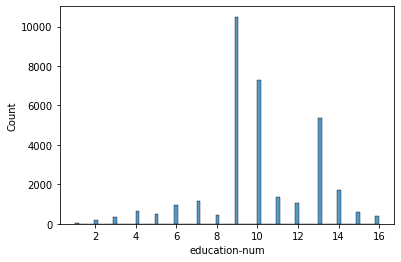

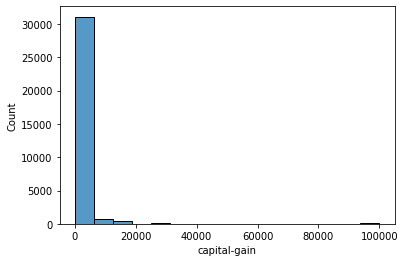

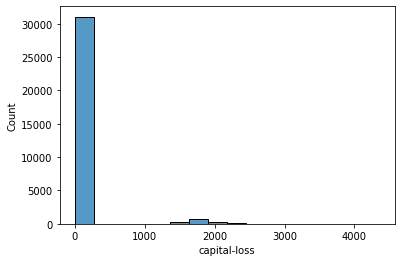

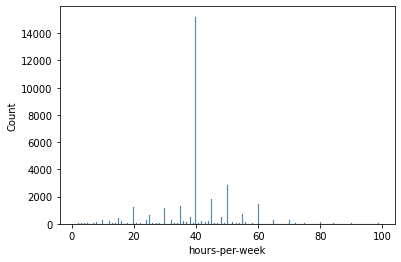

In [7]:
for col in numerical_features:
    sns.histplot(df[col])
    plt.show()

## Displot

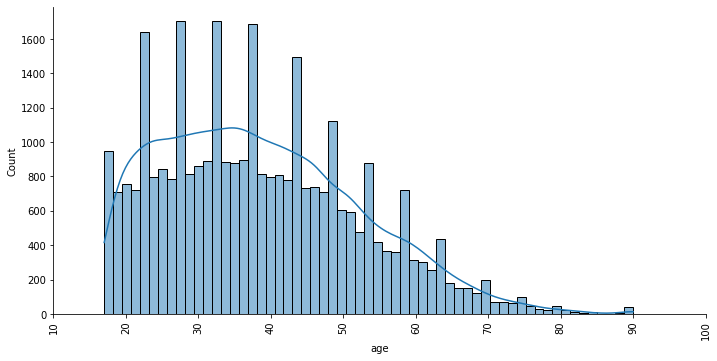

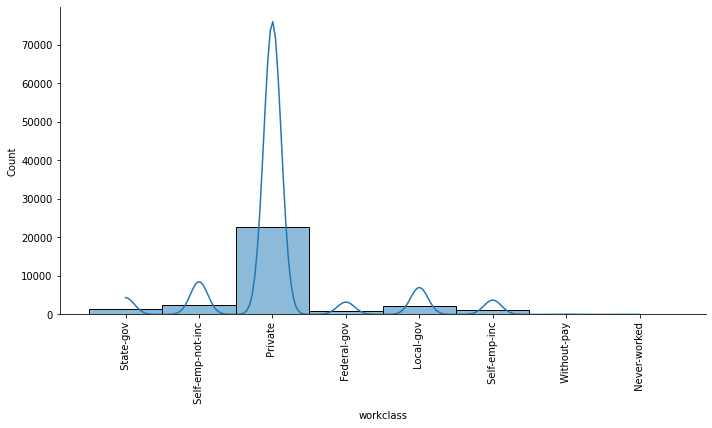

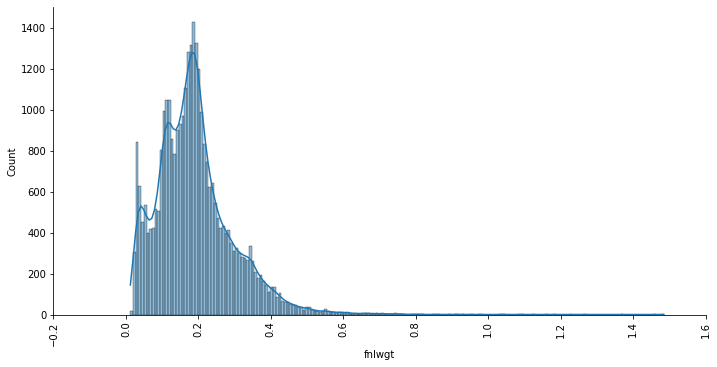

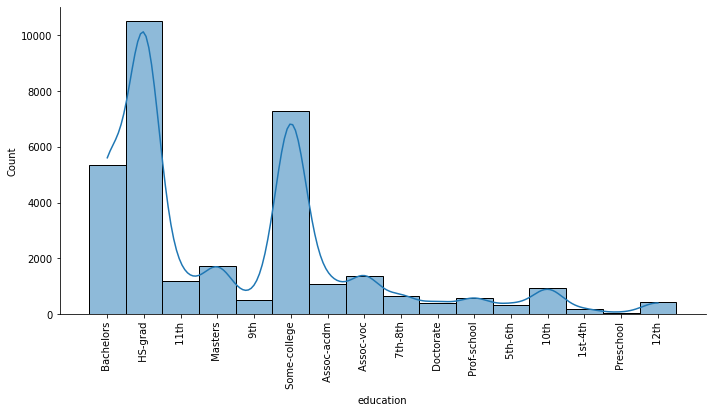

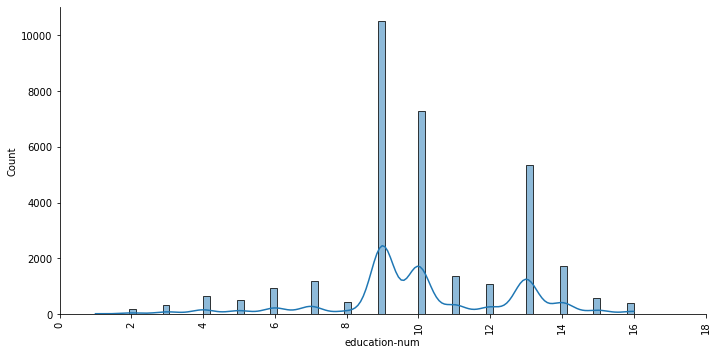

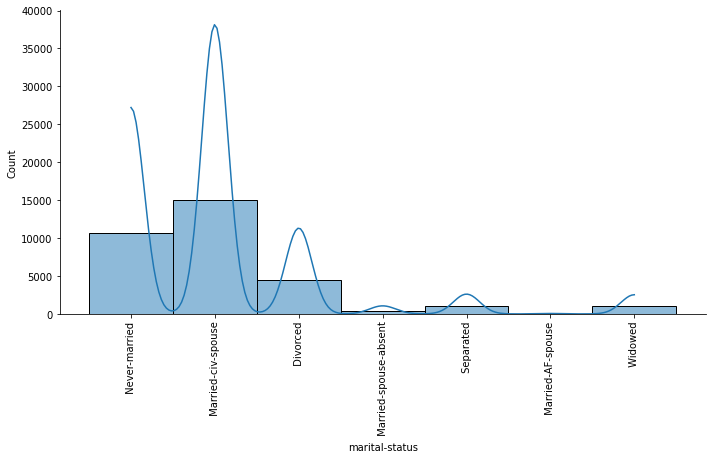

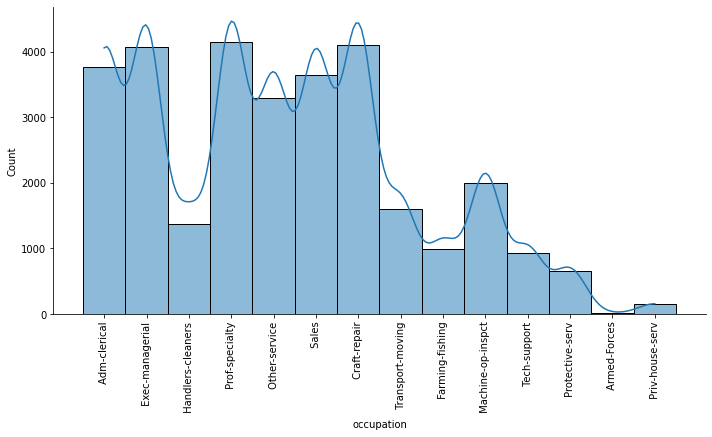

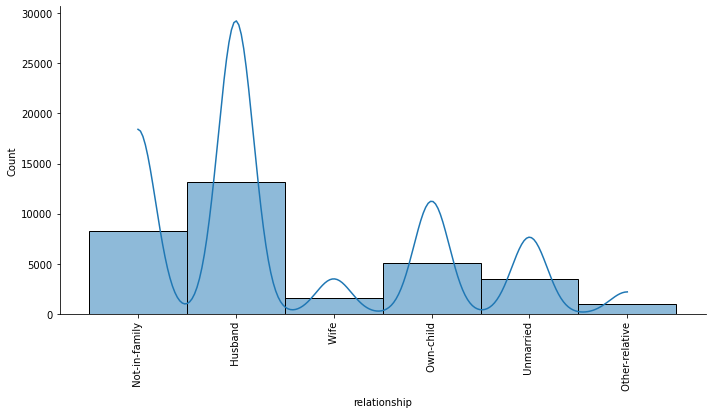

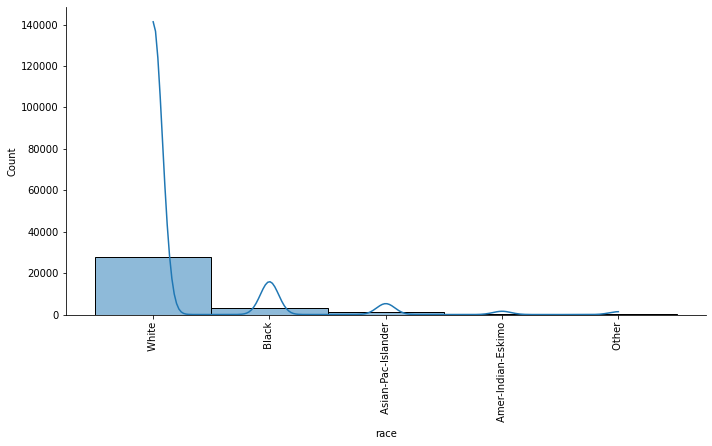

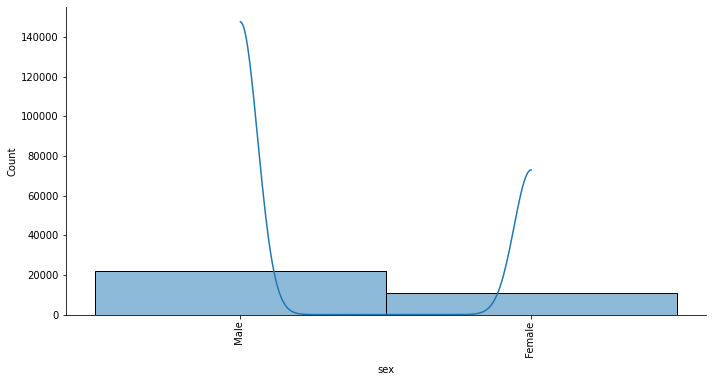

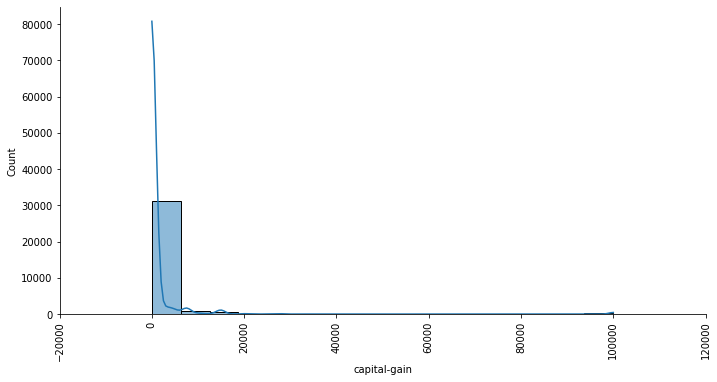

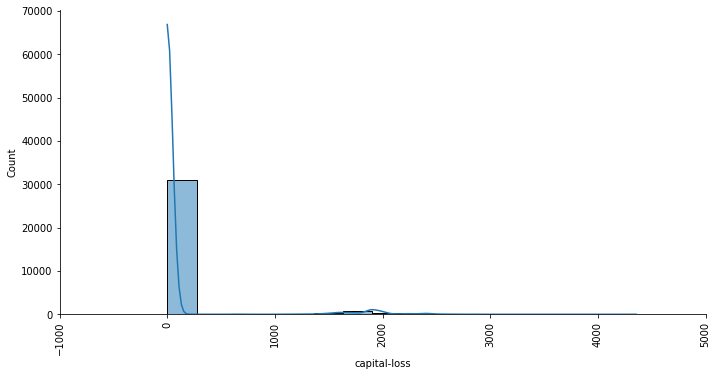

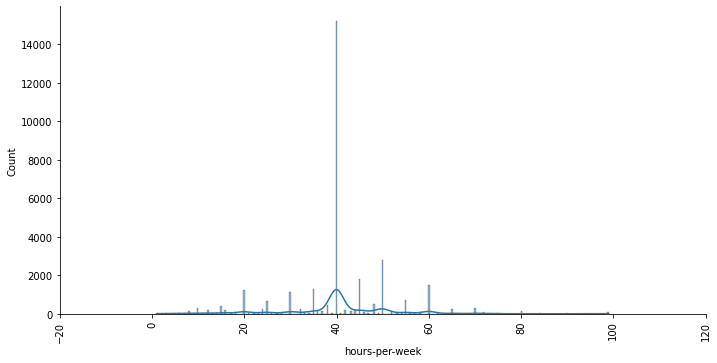

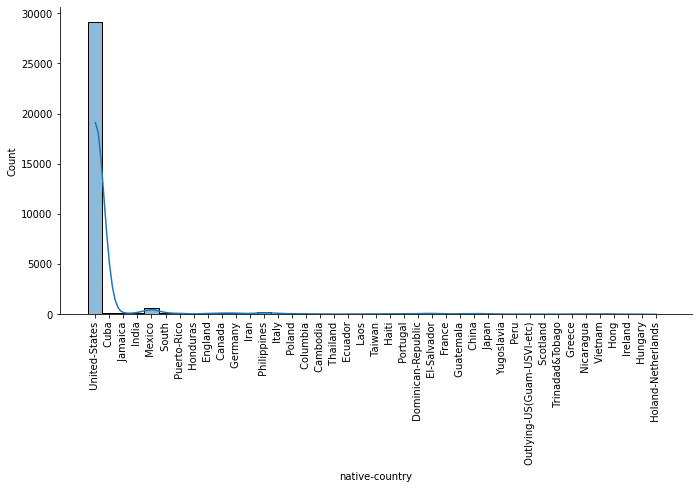

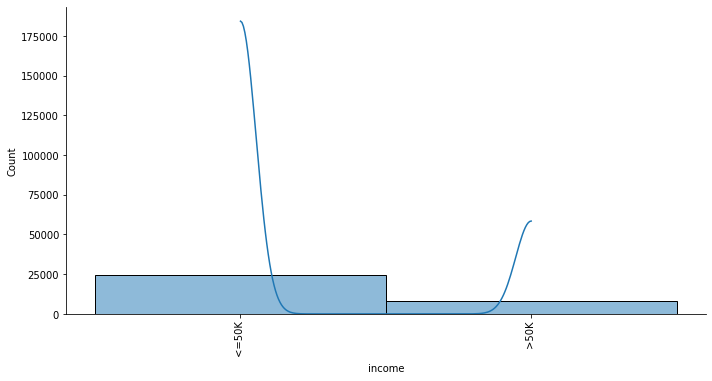

In [8]:
for col in df.columns:
    sns.displot(df[col], kde=True, legend=True, aspect=2).set_xticklabels(rotation=90)

## Are there any outliers present?

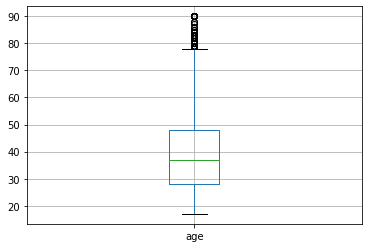

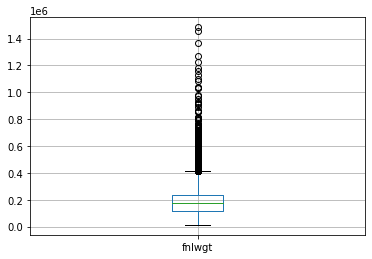

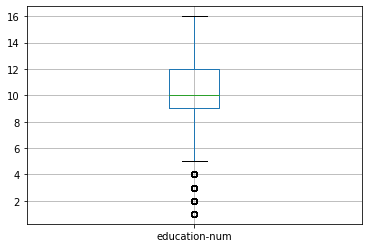

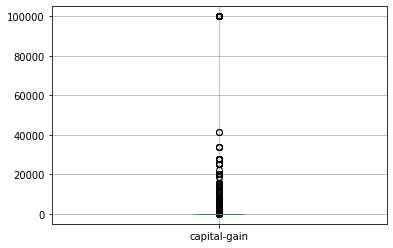

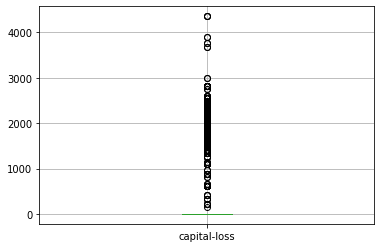

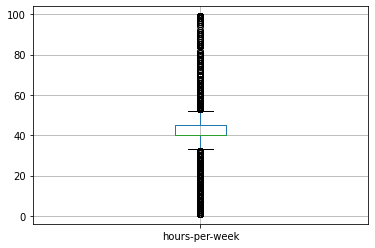

In [9]:
for col in numerical_features:
  df.boxplot(col)
  plt.show()

# Feature Engineering

# Replace none values

In [10]:
df_modified=df
for col in numerical_features:
  df_modified[col].replace( np.NaN, df.median(axis=0,skipna=True)[col],inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
for col in categorical_features:
  df_modified[col].replace( np.NaN, df.mode()[col][0],inplace=True)

## Replace categorical features with numerical values

In [12]:
df_cat_to_num=pd.get_dummies(df_modified)

In [45]:
df_cat_to_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,5.130679,266.098568,13,0.559558,0.274534,39.163404,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,5.612071,274.345493,13,0.559558,0.274534,31.621057,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,5.081547,410.077483,9,0.559558,0.274534,39.163404,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,5.728022,425.012149,7,0.559558,0.274534,39.163404,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,4.520327,495.934871,13,0.559558,0.274534,39.163404,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Using boxcox to normalise data

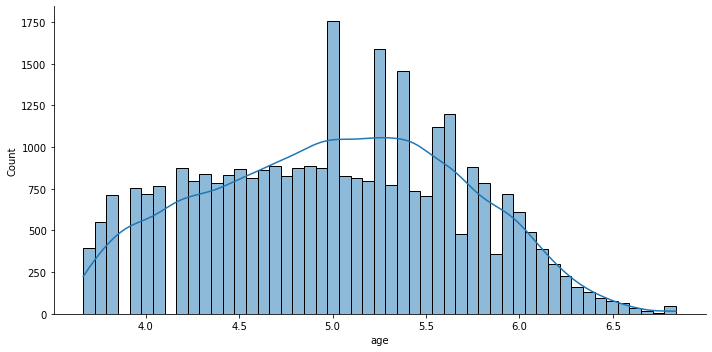

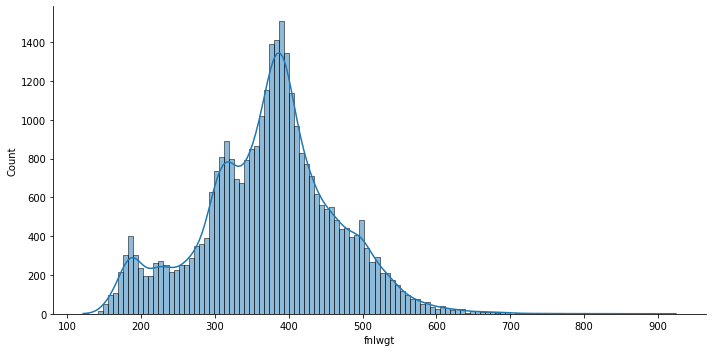

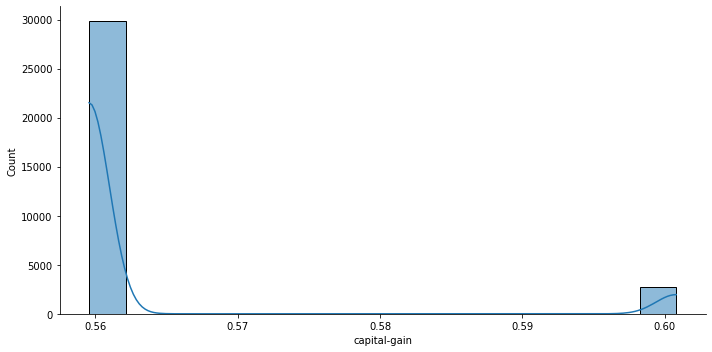

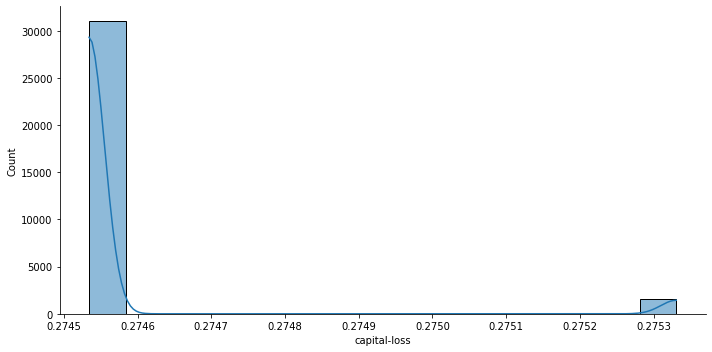

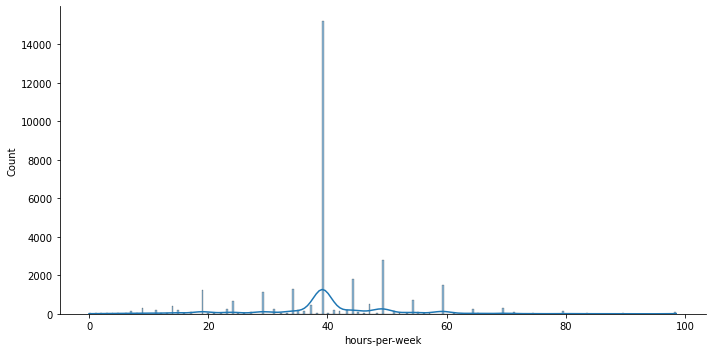

In [15]:
df_normalized=df_cat_to_num
df_normalized['capital-gain']=df_normalized['capital-gain']+5
df_normalized['capital-loss']=df_normalized['capital-loss']+5
for feature in continuous_features:
    df_normalized[feature] = pd.DataFrame(stats.boxcox(df_normalized[feature])[0])
#     print(df[feature])
    sns.displot(df_normalized[feature], kde=True, legend=True, height=5, aspect=2)

## Removing outliers

In [16]:
for feature in numerical_features:
    q75,q25 = np.percentile(df_normalized.loc[:,feature],[75,25])
    intr_qr = q75-q25
 
    max_range= q75+(1.5*intr_qr)
    min_range = q25-(1.5*intr_qr)
    
    df_normalized[feature].values[df_normalized[feature].values < min_range] = min_range
    df_normalized[feature].values[df_normalized[feature].values > max_range] = max_range

In [46]:
df_normalized.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,5.130679,266.098568,13,0.559558,0.274534,39.163404,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,5.612071,274.345493,13,0.559558,0.274534,31.621057,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,5.081547,410.077483,9,0.559558,0.274534,39.163404,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,5.728022,425.012149,7,0.559558,0.274534,39.163404,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,4.520327,495.934871,13,0.559558,0.274534,39.163404,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


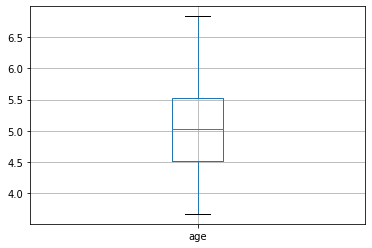

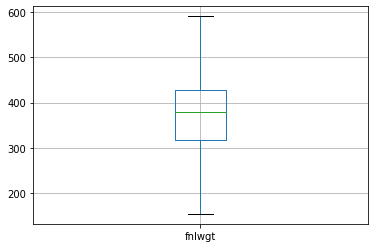

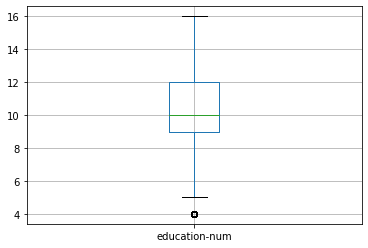

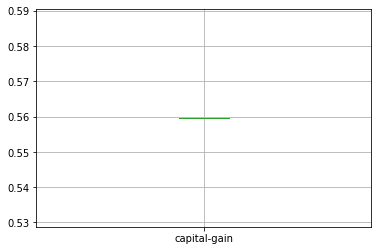

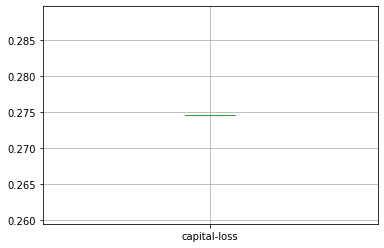

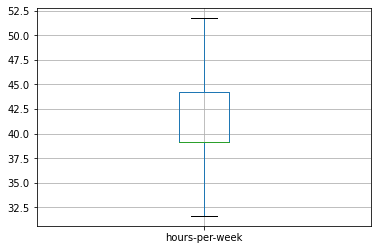

In [18]:
for col in numerical_features:
  df_normalized.boxplot(col)
  plt.show()

## Correlation

In [19]:
corr=df_normalized.corr()['income_ <=50K'][:]
corr

age                             -0.264097
fnlwgt                           0.004985
education-num                   -0.339579
capital-gain                          NaN
capital-loss                          NaN
                                   ...   
native-country_ United-States   -0.038942
native-country_ Vietnam          0.017649
native-country_ Yugoslavia      -0.006959
income_ <=50K                    1.000000
income_ >50K                    -1.000000
Name: income_ <=50K, Length: 107, dtype: float64

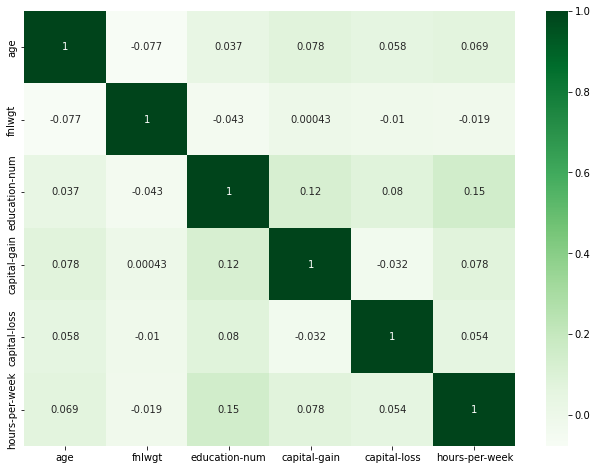

In [20]:
plt.figure(figsize=(11,8))
sns.heatmap(df_modified.corr(), cmap="Greens",annot=True)
plt.show()

##Modelling

In [21]:
X = df_normalized.drop(columns=['income_ >50K', 'income_ <=50K'])
y = df_normalized['income_ >50K']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Logistic regression tuning

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
score_list = []
solvers={'newton-cg':['l2','none'],'lbfgs': ['l2', 'none'],'liblinear':['l1', 'l2'],'sag':['l2', 'none'],'saga':['elasticnet', 'l1', 'l2', 'none']}
for solver,penalty in solvers.items():
  for p in penalty:
    try:
      logistic_regression = LogisticRegression(penalty=p, solver=solver)
  
      logistic_regression.fit(X_train, y_train)
      y_predict = logistic_regression.predict(X_test)
      accuracy = accuracy_score(y_test,y_predict)
      score_list.append([p,solver, accuracy])
    except:
      print("an error has occured")
    
df_LR = pd.DataFrame(score_list, columns=['penalty','solver','accuracy'])
print(df_LR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

an error has occured


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


   penalty     solver  accuracy
0       l2  newton-cg  0.834579
1     none  newton-cg  0.833965
2       l2      lbfgs  0.827413
3     none      lbfgs  0.826697
4       l1  liblinear  0.834783
5       l2  liblinear  0.834579
6       l2        sag  0.814515
7     none        sag  0.814515
8       l1       saga  0.806428
9       l2       saga  0.807043
10    none       saga  0.806428


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [26]:
score_list_c=[]
for c in [100, 10, 1.0, 0.1, 0.01]:
   logistic_regression = LogisticRegression(solver='liblinear', penalty='l1', C=c)
   logistic_regression.fit(X_train, y_train)
   y_predict = logistic_regression.predict(X_test)
   accuracy = accuracy_score(y_test,y_predict)
   score_list_c.append([c, accuracy])
df_LR_1 = pd.DataFrame(score_list_c, columns=['c','accuracy'])
print(df_LR_1)

        c  accuracy
0  100.00  0.834374
1   10.00  0.834272
2    1.00  0.835091
3    0.10  0.832736
4    0.01  0.820555


In [28]:
final_lr_model=LogisticRegression(solver='liblinear', penalty='l1', C=1.0)
final_lr_model.fit(X_train, y_train)
y_predict = final_lr_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8350905926911659

## Random forest classifier tuning

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
score_list_rfc=[]
for depth in range(1,40):
  rfc= RandomForestClassifier(random_state=0,max_depth=depth)
  rfc.fit(X_train,y_train)
  y_predict = rfc.predict(X_test)
  accuracy = accuracy_score(y_test,y_predict)
  score_list_rfc.append([depth,accuracy])

In [31]:
score_list_rfc

[[1, 0.7648684614597195],
 [2, 0.7648684614597195],
 [3, 0.7968062237690654],
 [4, 0.8125703756781656],
 [5, 0.8257754120176067],
 [6, 0.8264919643771113],
 [7, 0.8291534445695568],
 [8, 0.8288463507011977],
 [9, 0.8302794554202068],
 [10, 0.8327362063670796],
 [11, 0.8338622172177296],
 [12, 0.8365236974101751],
 [13, 0.8386733544886887],
 [14, 0.8393899068481933],
 [15, 0.8399017299621251],
 [16, 0.8384686252431159],
 [17, 0.8421537516634251],
 [18, 0.8404135530760569],
 [19, 0.8376497082608251],
 [20, 0.8391851776026206],
 [21, 0.8376497082608251],
 [22, 0.8376497082608251],
 [23, 0.8383662606203296],
 [24, 0.8353976865595251],
 [25, 0.8353976865595251],
 [26, 0.8355000511823114],
 [27, 0.8328385709898659],
 [28, 0.8340669464633023],
 [29, 0.8334527587265841],
 [30, 0.8314054662708568],
 [31, 0.8309960077797113],
 [32, 0.8299723615518477],
 [33, 0.8282321629644794],
 [34, 0.8289487153239841],
 [35, 0.8265943289998976],
 [36, 0.8280274337189067],
 [37, 0.8276179752277613],
 [38, 0.83

In [35]:
accuracy

0.8421537516634251

In [38]:
score_list_rfc_1=[]
for trees in range(100,1001,100):
  rfc= RandomForestClassifier(random_state=0,max_depth=17,n_estimators=trees)
  rfc.fit(X_train,y_train)
  y_predict = rfc.predict(X_test)
  accuracy = accuracy_score(y_test,y_predict)
  score_list_rfc_1.append([trees,accuracy])

In [39]:
score_list_rfc_1

[[100, 0.8421537516634251],
 [200, 0.8417442931722796],
 [300, 0.8422561162862114],
 [400, 0.8424608455317842],
 [500, 0.8420513870406388],
 [600, 0.8414371993039206],
 [700, 0.8418466577950661],
 [800, 0.8414371993039206],
 [900, 0.8415395639267069],
 [1000, 0.8414371993039206]]

In [40]:
score_list_rfc_2=[]
for max_feature in ['auto','sqrt']:
  rfc= RandomForestClassifier(random_state=0,max_depth=17,n_estimators=400,max_features=max_feature)
  rfc.fit(X_train,y_train)
  y_predict = rfc.predict(X_test)
  accuracy = accuracy_score(y_test,y_predict)
  score_list_rfc_2.append([max_feature,accuracy])

In [41]:
score_list_rfc_2

[['auto', 0.8424608455317842], ['sqrt', 0.8424608455317842]]

In [42]:
final_rfc_model= RandomForestClassifier(random_state=0,max_depth=17,n_estimators=400,)
final_rfc_model.fit(X_train,y_train)
y_predict = final_rfc_model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)

In [43]:
accuracy

0.8424608455317842

In [44]:
columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
inp=[76, ' Private',124191, ' Masters',14, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male',0,0,40, ' United-States']

inp_data={}
i=0

for col in columns:
  inp_data[col]=[inp[i]]
  i=i+1
inp_data=pd.DataFrame(inp_data)
inp_data=pd.get_dummies(inp_data)
print(type(inp_data))
df_modified_inp=pd.DataFrame()
for col in df_normalized.columns:
  df_modified_inp[col]=[0]
for col in inp_data:
  df_modified_inp[col]=inp_data[col]
df_modified_inp['capital-gain']=df_modified_inp['capital-gain']+5
df_modified_inp['capital-loss']=df_modified_inp['capital-loss']+5

df_modified_inp.drop(columns=['income_ >50K', 'income_ <=50K'],inplace=True)

y_predict = final_rfc_model.predict(df_modified_inp)
print(y_predict)

<class 'pandas.core.frame.DataFrame'>
[1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app
